In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
# Load the files
#sgn_vloose = np.load('data17_13TeV.AllPeriods.sgn.VL_z0off_EGAM2.bkg.VetoVL_z0off_EGAM7.Rel21.GRL_v97.npz')
#sgn_loose  = np.load('sample_loose.npz')
#sgn_tight  = np.load('data17_13TeV.AllPeriods.sgn.probes_EGAM2.bkg.VProbes_EGAM7.Rel21.GRL_v97.npz')
#sgn_medium = np.load('data17_13TeV.AllPeriods.sgn.Medium_EGAM2.bkg.VetoVL_EGAM7.Rel21.GRL_v97.npz')

sgn_medium = np.load('/home/wsfreund/CERN-DATA/Offline/tuningData/mc16calo_lhgrid_v3/mc16a.zee.20M.jf17.20M.offline.binned.calo.wdatadrivenlh.npz')

In [3]:
def plot_mean_profile(data_file, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [2,3]
    etRange = ['[30, 40]']
    
    eta_index = [0,1,2]
    etaRange = ['[0, 0.6]','[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='cornflowerblue')
            plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-')
            plt.legend(['Electron', 'Background'], loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Mean Energy Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Energy [MeV]', fontsize=15)
            
            if log_scale:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('meanProfile_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'_et{}_eta{}.pdf'.format(iet, ieta))
            #plt.show()

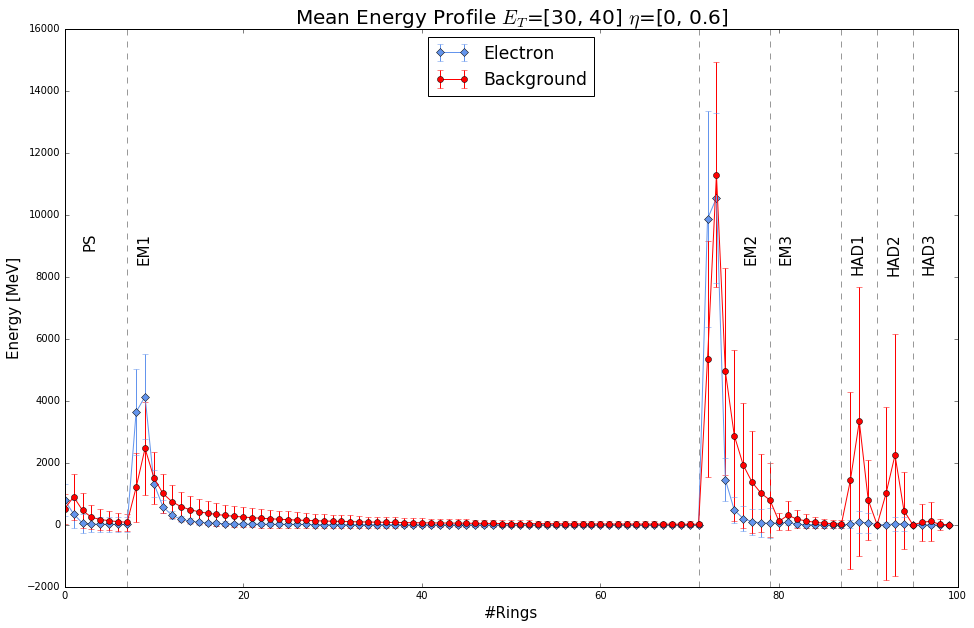

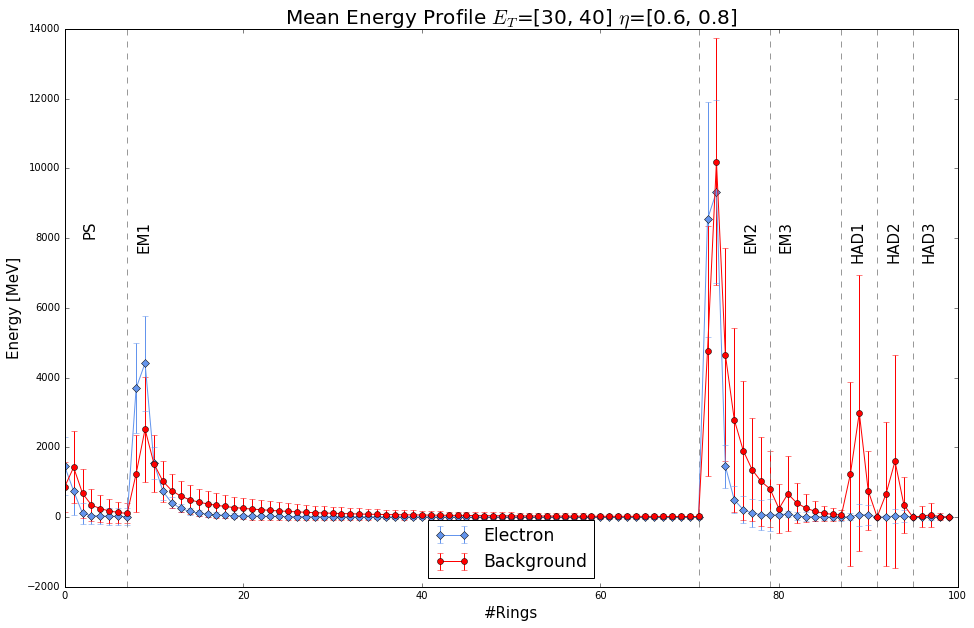

In [5]:
plot_mean_profile(sgn_medium, log_scale=False, output_name='medium')

In [7]:
loaded = np.load('/home/caducovas/pdfs.npz')

In [5]:
def plot_mean_profile_separed(data_file, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [2,3]
    etRange = ['[30, 40]']
    
#    eta_index = [0,1,2]
#    etaRange = ['[0, 0.6]','[0.6, 0.8]']
    
    eta_index = [1,2]
    etaRange = ['[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(25,10))
            ax1.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='cornflowerblue', label='Mean Profile')
            ax1.plot(np.arange(100), np.max(sgn, axis=0), '^-', color='darkblue', label='Max Profile')
            ax1.set_title(r'Signal Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            ax1.set_xlabel('#Rings', fontsize= 20)
            ax1.set_ylabel('Energy [MeV]',fontsize= 20)
            ax1.tick_params(labelsize= 15)
            ax1.legend(loc='best', fontsize='xx-large')
            
            ax2.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-',
                         label='Mean Profile')
            ax2.plot(np.arange(100), np.max(bkg, axis=0), '^-', color='darkred', label='Max Profile')
            ax2.set_title(r'Background Patterns $E_T$={} Eta={}'.format(etrange,etarange),fontsize= 20)
            ax2.set_xlabel('#Rings', fontsize= 20)
            ax2.set_ylabel('Energy [MeV]',fontsize= 20)
            ax2.tick_params(labelsize= 15)
            ax1.legend(loc='best', fontsize='xx-large')
            #plt.legend(['Electron', 'Background'], loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                ax1.axvline(i, color='gray', linestyle='--', linewidth=.8)
                ax2.axvline(i, color='gray', linestyle='--', linewidth=.8)
            
            if log_scale:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                ax1.text(x,y,text, fontsize=15, rotation=90)
                ax2.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('meanProfile_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'_meanProfile_et{}_eta{}.pdf'.format(iet, ieta))
            #plt.show()

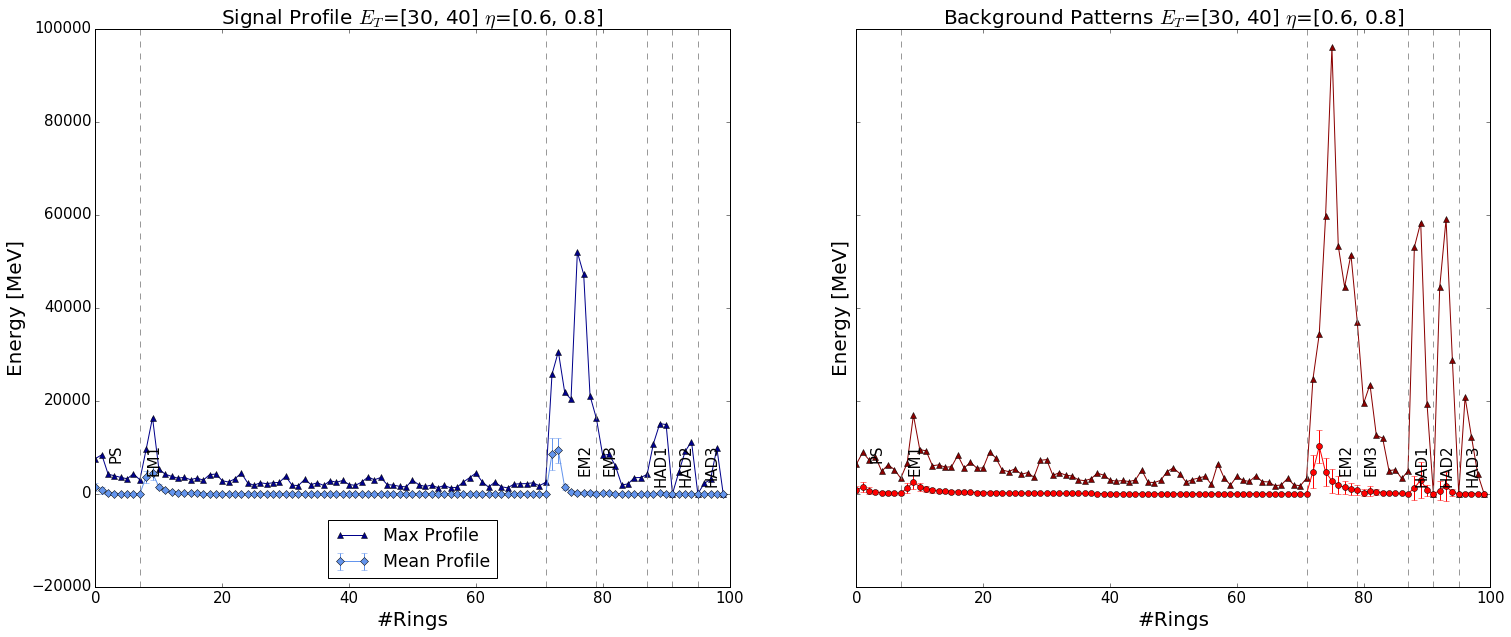

In [6]:
plot_mean_profile_separed(sgn_medium, log_scale=False, output_name='medium')

In [8]:
def plot_mean_profile_per_figure(data_file, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [2,3]
    etRange = ['[30, 40]']
    
    eta_index = [0,1,2]
    etaRange = ['[0, 0.6]','[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='b',
                         label='Mean Profile')
            plt.plot(np.arange(100), np.max(sgn, axis=0), '^-', color='darkblue', label='Max Profile')
            plt.plot(np.arange(100), np.min(sgn, axis=0), 'v-', color='cornflowerblue', label='Min Profile')
            #plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-')
            plt.legend(loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Mean Energy Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Energy [MeV]', fontsize=15)
            
            if log_scale:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.min(sng, axis=0), np.max(sgn, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(sgn, axis=0), np.max(sgn, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('Profile_sgn_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'Profile_sgn_et{}_eta{}.pdf'.format(iet, ieta))
            plt.close()
            
            # Bkg profiles
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='D-', color='r',
                         label='Mean Profile')
            plt.plot(np.arange(100), np.max(bkg, axis=0), '^-', color='darkred', label='Max Profile')
            plt.plot(np.arange(100), np.min(bkg, axis=0), 'v-', color='tomato', label='Min Profile')
            plt.legend(loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Mean Energy Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Energy [MeV]', fontsize=15)
            
            if log_scale:
                y_position = .8*np.max([np.mean(bkg, axis=0), np.min(bkg, axis=0), np.max(bkg, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(bkg, axis=0), np.mean(bkg, axis=0), np.max(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('Profile_bkg_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'Profile_bkg_et{}_eta{}.pdf'.format(iet, ieta))
            #plt.show()

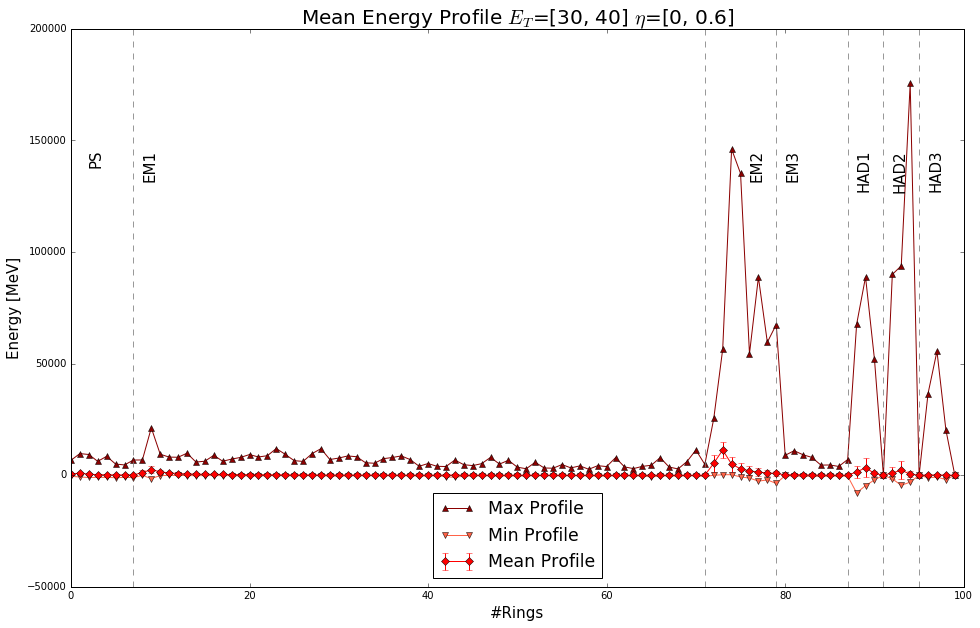

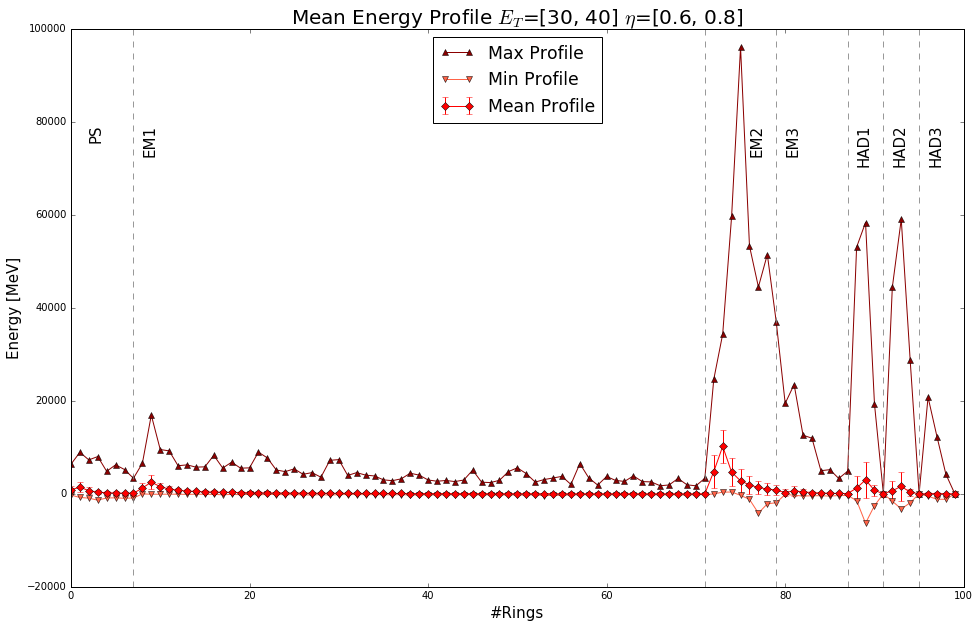

In [9]:
plot_mean_profile_per_figure(sgn_medium)

In [10]:
np.std(sgn_tight['signalPatterns_etBin_0_etaBin_0'], axis=0)

array([ 225.70175171,  294.49710083,  287.04840088,  233.62155151,
        235.26263428,  224.41751099,  204.2321167 ,  188.39251709,
        234.84609985,  274.98251343,  140.2250824 ,   80.78117371,
         65.54857635,   59.80945206,   56.30541229,   54.07242203,
         54.31510544,   54.14137268,   54.62789536,   54.42529678,
         53.96117783,   53.46917343,   53.78199005,   55.10902786,
         54.45621109,   54.92973709,   54.11561966,   54.4991951 ,
         54.60214996,   55.66257858,   55.29161072,   55.33224487,
         54.88100433,   55.3015213 ,   56.52469254,   56.70786285,
         56.14803314,   55.77177048,   55.39471054,   55.41602707,
         56.23092651,   57.18031693,   56.37686157,   56.77375412,
         55.64052582,   55.31318283,   55.16608047,   53.8953743 ,
         54.05832672,   54.2342453 ,   53.81749344,   52.90527344,
         50.81797409,   50.95729828,   50.31710815,   49.20751572,
         50.4239006 ,   49.84628296,   50.04117584,   49.54649